In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
exp11_df = pd.read_csv('./csv/exp11_weight.csv', sep=';')

In [3]:
exp11_df

,T1,T2,Object,Weight
0,-450255,-537002,Газификатор,110.14
1,-450779,-536979,Газификатор,110.14
2,-450598,-536941,Газификатор,110.14
3,-121583,-149467,Хладис,27.78
4,-121468,-149293,Хладис,27.78
5,-121644,-149305,Хладис,27.78
6,-227072,-279158,Хладис+6 бутылок,54.82
7,-227283,-279056,Хладис+6 бутылок,54.82
8,-227094,-279363,Хладис+6 бутылок,54.82
9,-82151,-116007,Палета1,19.04


In [4]:
exp11_df.columns = exp11_df.columns.str.strip()

In [5]:
# Целевая переменная (масса)
y = exp11_df['Weight']

In [6]:
# Модель для T1
X_T1 = exp11_df[['T1']]  # Используем только T1
model_T1 = LinearRegression()
model_T1.fit(X_T1, y)
y_pred_T1 = model_T1.predict(X_T1)  # Предсказания для T1

In [7]:
# Модель для T2
X_T2 = exp11_df[['T2']]  # Используем только T2
model_T2 = LinearRegression()
model_T2.fit(X_T2, y)
y_pred_T2 = model_T2.predict(X_T2)  # Предсказания для T2

In [8]:
# Вычисляем метрики для T1
mse_T1 = mean_squared_error(y, y_pred_T1)
r2_T1 = r2_score(y, y_pred_T1)

In [9]:
# Вычисляем метрики для T2
mse_T2 = mean_squared_error(y, y_pred_T2)
r2_T2 = r2_score(y, y_pred_T2)

/home/stacy/rocket_science/soft/myenv/lib/python3.12/site-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/stacy/rocket_science/soft/myenv/lib/python3.12/site-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))


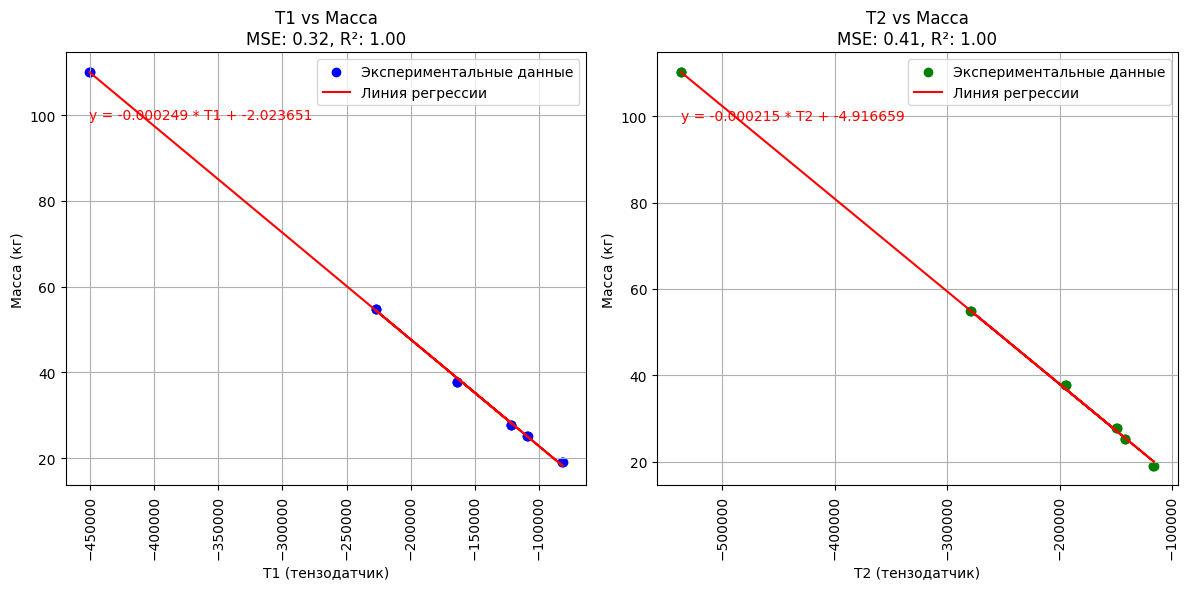

In [10]:
# Построение графиков
plt.figure(figsize=(12, 6))  # Увеличиваем размер графиков

# График для T1
plt.subplot(1, 2, 1)
plt.scatter(X_T1, y, color='blue', label='Экспериментальные данные')
plt.plot(X_T1, y_pred_T1, color='red', label='Линия регрессии')
plt.title(f'T1 vs Масса\nMSE: {mse_T1:.2f}, R²: {r2_T1:.2f}')
plt.xlabel('T1 (тензодатчик)')
plt.ylabel('Масса (кг)')
plt.legend()
plt.grid()

# Уравнение для T1
coef_T1 = model_T1.coef_[0]
intercept_T1 = model_T1.intercept_
plt.text(
    X_T1.min(), y.max() * 0.9,  # Позиция текста на графике
    f'y = {coef_T1:.6f} * T1 + {intercept_T1:.6f}',
    color='red',
    fontsize=10
)

# Поворот подписей оси X для T1
plt.xticks(rotation=90)

# График для T2
plt.subplot(1, 2, 2)
plt.scatter(X_T2, y, color='green', label='Экспериментальные данные')
plt.plot(X_T2, y_pred_T2, color='red', label='Линия регрессии')
plt.title(f'T2 vs Масса\nMSE: {mse_T2:.2f}, R²: {r2_T2:.2f}')
plt.xlabel('T2 (тензодатчик)')
plt.ylabel('Масса (кг)')
plt.legend()
plt.grid()

# Уравнение для T2
coef_T2 = model_T2.coef_[0]
intercept_T2 = model_T2.intercept_
plt.text(
    X_T2.min(), y.max() * 0.9,  # Позиция текста на графике
    f'y = {coef_T2:.6f} * T2 + {intercept_T2:.6f}',
    color='red',
    fontsize=10
)

# Поворот подписей оси X для T2
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(f'./results/fig/T1_T2_weight.png', dpi=300)
plt.show()

In [11]:
print("Уравнение для T1:")
print(f"y = {model_T1.coef_[0]} * T1 + {model_T1.intercept_}")

Уравнение для T1:
y = -0.0002486984460308264 * T1 + -2.0236508325147184


In [12]:
print("Уравнение для T2:")
print(f"y = {model_T2.coef_[0]} * T2 + {model_T2.intercept_}")

Уравнение для T2:
y = -0.00021454187943563172 * T2 + -4.916659361374855
